# Напишите заголовок проекта здесь

- Автор: Колдашев Виталий Андреевич
- Дата: 31.12.2024
- Ссылка на Github: https://github.com/PsychoCoderrr/YPracticumProjects/blob/main/VizPythonProject.ipynb

### Цели и задачи проекта

#### Цель проекта

Цель проекта — провести исследовательский анализ рынка заведений общественного питания в Москве. Это поможет инвесторам фонда Shut Up and Take My Money принять обоснованное решение о формате заведения, его расположении, ценовом сегменте и других ключевых аспектах для запуска успешного бизнеса в этой области.
 
#### Задачи проекта:
  1. Анализ предоставленных данных:
     - Изучить структуру и содержание данных о заведениях общественного питания и их средней ценовой категории.
     - Проверить данные на наличие пропусков, дубликатов и ошибок, а также исправить их при необходимости.
     - Привести данные к формату, удобному для анализа, включая выделение новых признаков.
  2. Исследование характеристик рынка:
     - Определить распределение категорий заведений (кафе, рестораны, бары и т. д.) и их количество.
     - Исследовать распределение заведений по административным районам Москвы.
     - Выяснить, какие категории заведений чаще являются сетевыми.
     - Оценить количество посадочных мест в заведениях, выявить типичные значения и возможные аномалии.
  3. Изучение рейтингов:
     - Проанализировать средние рейтинги заведений по категориям и выявить различия между ними.
     - Определить, с какими факторами (тип заведения, район, ценовой сегмент и т. д.) наиболее сильно коррелируют рейтинги.
  4. Анализ ценового сегмента:
     - Исследовать распределение среднего чека по районам Москвы.
     - Сравнить цены в центральном административном округе с другими районами.
     - Изучить зависимость стоимости чашки кофе от типа заведения и района.
  6. Выявление популярных сетей:
     - Найти топ-15 самых популярных сетей в Москве и изучить их категории.
     - Рассчитать средний рейтинг для каждого из популярных брендов.
  7. Итоговый вывод и рекомендации:
      - Подготовить рекомендации для инвесторов по выбору.
      - Обосновать выбор на основе результатов анализа данных.

### Описание данных

#### Датасет rest_info.csv
- name - название заведения;
- address - адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    * 0 — заведение не является сетевым;
    * 1 — заведение является сетевым.
- seats — количество посадочных мест.
#### Датасет rest_price.csv
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    * «Цена бокала пива: 400–600 ₽».
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Оглавление проекта

- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Итоговый вывод и рекомендации

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
import pandas as pd

In [2]:
df_info = pd.read_csv('https://code.s3.yandex.net//datasets/rest_info.csv')

In [3]:
df_price = pd.read_csv('https://code.s3.yandex.net//datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
#вывод первых пяти строк датафрейма df_info
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
#вывод информации о датафрейме df_info
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
#вывод первых пяти строк датафрейма df_price
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
#вывод информации о датафрейме df_price
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Первый вывод, который можно сделать сразу по обоим датафреймам это то, что везде используются корректные названия, соблюдается snake case

Дальше по датафрейму df_info можно сделать вывод, что общее кол-во строк равно 8046, мы видим пропуски в столбцах hours и seats, типы данных в этом датафрейме используются правильные

В датафрейме df_price мы видим общее кол-во строк 4058, а так же то, что пропуски есть во всех стобцах, кроме id, типы данных используются правильные везде

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [8]:
df_merged = pd.merge(df_info, df_price, on='id')

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   name               4058 non-null   object 
 2   category           4058 non-null   object 
 3   address            4058 non-null   object 
 4   district           4058 non-null   object 
 5   hours              4050 non-null   object 
 6   rating             4058 non-null   float64
 7   chain              4058 non-null   int64  
 8   seats              2519 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 412.3+ KB


Типы данных в датафрейме корректны

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [10]:
#абсолютные значения кол-ва пропусков в столбцах
missing_absolute = df_merged.isna().sum()
missing_absolute

id                      0
name                    0
category                0
address                 0
district                0
hours                   8
rating                  0
chain                   0
seats                1539
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

In [11]:
#относительное кол-во пропусков, выраженное в процентах
missing_relative = df_merged.isna().sum() / len(df_merged) * 100
missing_relative

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 0.197141
rating                0.000000
chain                 0.000000
seats                37.925086
price                18.309512
avg_bill              5.963529
middle_avg_bill      22.400197
middle_coffee_cup    86.816166
dtype: float64

Видим, что пропусков в столбцах hours и avg_bill мало, их можно будет просто удалить, пропуски в столбцах seats, middle_avg_bill и middle_coffee_cup можно будет заменить на -1, а пропуски в столбце price оставить, их можно было бы заполнить, основываясь на столбцах middle_avg_bill и middle_coffee_cup, однако мы не знаем точные категориальные рамки, а если мы начнем придумывать их сами, то можем внести неправильные данные в наш датафрейм

In [12]:
#посчитаем кол-во строк, которое было до удаления пропусков
start_str_count = df_merged.shape[0]
start_str_count 

4058

In [13]:
#произведем удаление пропусков
df_merged = df_merged.dropna(subset=['hours', 'avg_bill'])

In [14]:
#посчитаем кол-во строк, которое осталось после удаления пропусков
intermediate_str_count = df_merged.shape[0]
intermediate_str_count

3808

In [15]:
#посчитаем кол-во строк, которое было удалено
start_str_count - intermediate_str_count

250

In [16]:
array = ['seats', 'middle_avg_bill', 'middle_coffee_cup']
for i in array:
    df_merged[i] = df_merged[i].fillna(-1) 
#вывод информации для проверки корректности заполнения пропусков
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 0 to 4057
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3808 non-null   object 
 1   name               3808 non-null   object 
 2   category           3808 non-null   object 
 3   address            3808 non-null   object 
 4   district           3808 non-null   object 
 5   hours              3808 non-null   object 
 6   rating             3808 non-null   float64
 7   chain              3808 non-null   int64  
 8   seats              3808 non-null   float64
 9   price              3068 non-null   object 
 10  avg_bill           3808 non-null   object 
 11  middle_avg_bill    3808 non-null   float64
 12  middle_coffee_cup  3808 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 416.5+ KB


- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [17]:
unique_category = df_merged['category'].unique()
unique_category

array(['ресторан', 'кафе', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'столовая', 'булочная'], dtype=object)

In [18]:
unique_district = df_merged['district'].unique()
unique_district

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Мы видим, что в столбцах category и district можно не проводить нормализацию данных, соответственно проведем ее для адресов и названий заведений

In [19]:
for i in ['name', 'address']:
    df_merged[i] = df_merged[i].str.lower()

In [20]:
#проводим удаление дубликатов
df_merged.drop_duplicates()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, 0 to 4057
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3808 non-null   object 
 1   name               3808 non-null   object 
 2   category           3808 non-null   object 
 3   address            3808 non-null   object 
 4   district           3808 non-null   object 
 5   hours              3808 non-null   object 
 6   rating             3808 non-null   float64
 7   chain              3808 non-null   int64  
 8   seats              3808 non-null   float64
 9   price              3068 non-null   object 
 10  avg_bill           3808 non-null   object 
 11  middle_avg_bill    3808 non-null   float64
 12  middle_coffee_cup  3808 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 416.5+ KB


In [21]:
#посчитаем кол-во строк в после удаления дубликатов
final_str_count = df_merged.shape[0]
final_str_count

3808

In [22]:
#посчитаем кол-во удаленных строк в ходе предобработки данных в абсолютном значении
deleted_str_count = start_str_count - final_str_count
deleted_str_count

250

In [23]:
#посчитаем кол-во удаленных строк в относительном значении
relative_deleted_str_count = round(deleted_str_count / start_str_count * 100, 2)
relative_deleted_str_count

6.16

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [24]:
df_merged['is_24_7'] = (df_merged['hours'] == 'ежедневно, круглосуточно')

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Можно сказать, что после проведенной предобработки данных были удалены 250 строк датафрейма, что в относительном значении составило 6.16% от изначального количества строк. Все удаления строк были связаны с борьбой с пропусками, дубликатов не было обнаружено.

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

In [25]:
import matplotlib.pyplot as plt

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

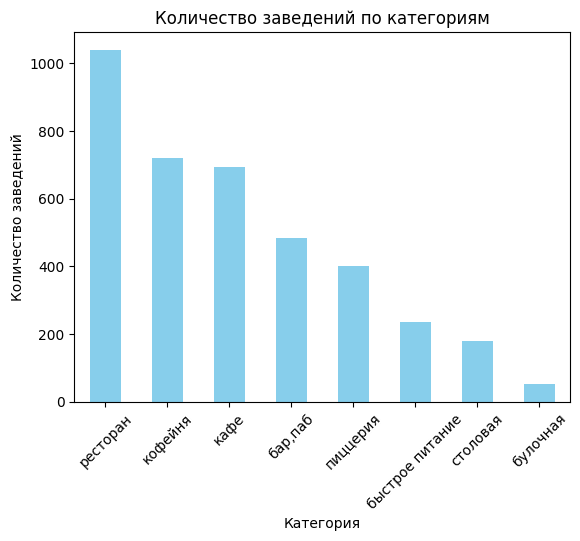

In [26]:
df_merged['category'].value_counts().plot(
    kind = 'bar',
    color = 'skyblue'
)
plt.title('Количество заведений по категориям')
plt.ylabel('Количество заведений')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.show()

Мы видим, что больше всего заведений в категории ресторанов

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

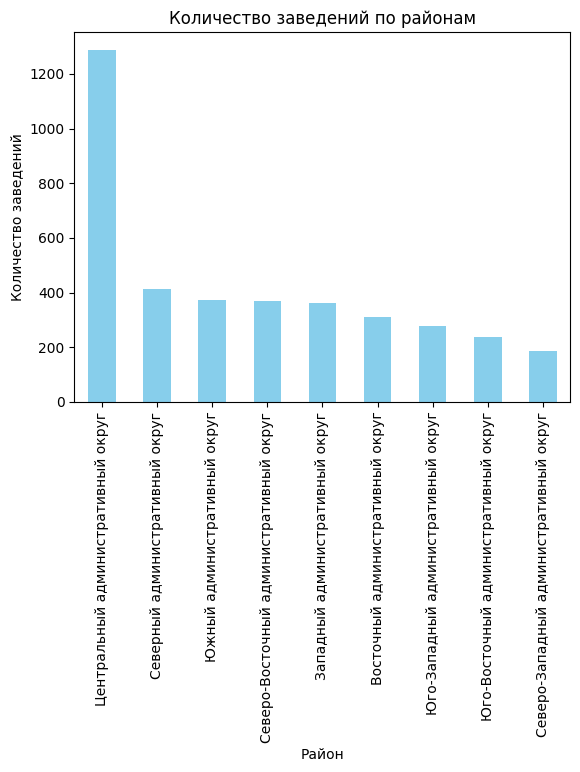

In [27]:
df_merged['district'].value_counts().plot(
    kind = 'bar',
    color = 'skyblue',
)
plt.title('Количество заведений по районам')
plt.ylabel('Количество заведений')
plt.xlabel('Район')
plt.show()

Видим, что в центральном административном округе резко больше заведений, чем во всех остальных (примерно в 3 раза)

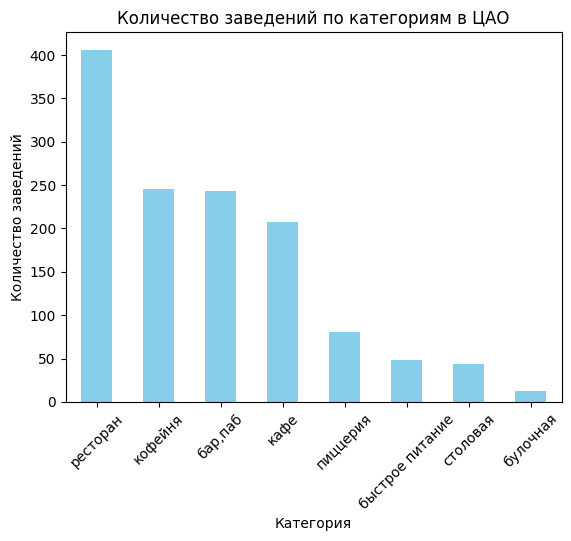

In [28]:
df_merged[df_merged['district'] == 'Центральный административный округ']['category'].value_counts().plot(
    kind = 'bar',
    color = 'skyblue'
)
plt.title('Количество заведений по категориям в ЦАО')
plt.ylabel('Количество заведений')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.show()

Видим, что в центральном административном округе точно так же преобладают рестораны

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

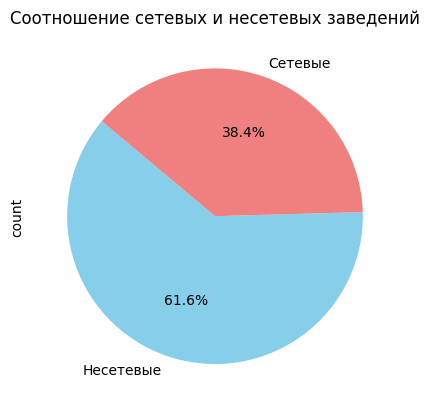

In [29]:
#рассчитаем соотношение сетевых и несетевых заведений в целом по данным
chain_labels = ['Несетевые', 'Сетевые']
df_merged['chain'].value_counts().plot(kind = 'pie', labels=chain_labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

Видим, что несетевых заведений больше, чем сетевых

<Axes: xlabel='category'>

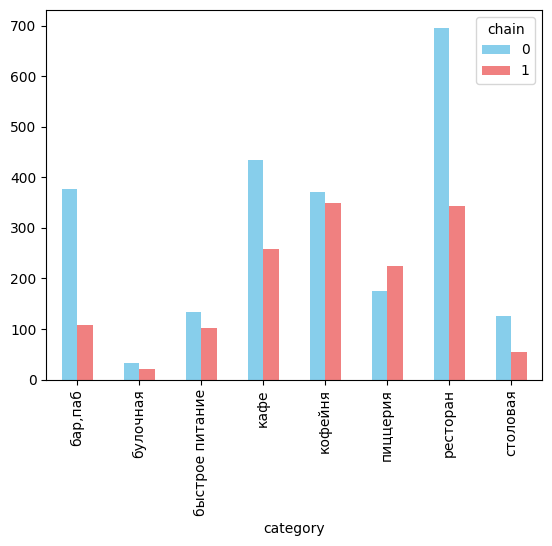

In [30]:
df_merged.groupby('category')['chain'].value_counts().unstack(fill_value=0).plot(
    kind = 'bar',
    color=['skyblue', 'lightcoral']
)

В разрезе категорий можно заметить, что только у пиццерий кол-во сетевых заведений больше, чем несетевых

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


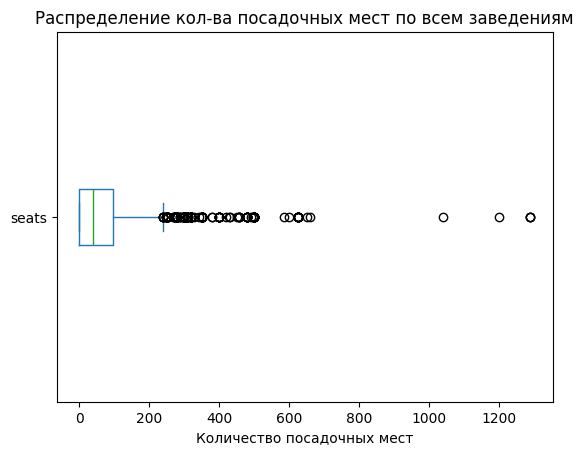

In [33]:
df_merged['seats'].plot(
    kind = 'box',
    vert = False
)
plt.title('Распределение кол-ва посадочных мест по всем заведениям')
plt.xlabel('Количество посадочных мест')
plt.show()

Мы видим достаточно большое количество выбросов, это может быть связано со спецификой заведений, например, они могут включать в себя большие банкетные залы для проведения торжеств, или же это могут просто ошибки заполнения данных.

In [42]:
#выведем для каждой категории заведений наиболее типичное количество мест, в нашем случае это будет медианное значение
#не забываем учитывать то, что пропуски в этом столбце мы заполнили значением -1
for i in df_merged['category'].unique():
    print(f"Наиболее типичное количесто мест для категории {i}:", df_merged[((df_merged['category'] == i) & (df_merged['seats']!= -1))]['seats'].median())

Наиболее типичное количесто мест для категории ресторан: 90.0
Наиболее типичное количесто мест для категории кафе: 60.0
Наиболее типичное количесто мест для категории кофейня: 80.0
Наиболее типичное количесто мест для категории пиццерия: 60.0
Наиболее типичное количесто мест для категории бар,паб: 85.0
Наиболее типичное количесто мест для категории быстрое питание: 75.0
Наиболее типичное количесто мест для категории столовая: 80.0
Наиболее типичное количесто мест для категории булочная: 89.0


---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'бар,паб'),
  Text(1, 0, 'булочная'),
  Text(2, 0, 'быстрое питание'),
  Text(3, 0, 'кафе'),
  Text(4, 0, 'кофейня'),
  Text(5, 0, 'пиццерия'),
  Text(6, 0, 'ресторан'),
  Text(7, 0, 'столовая')])

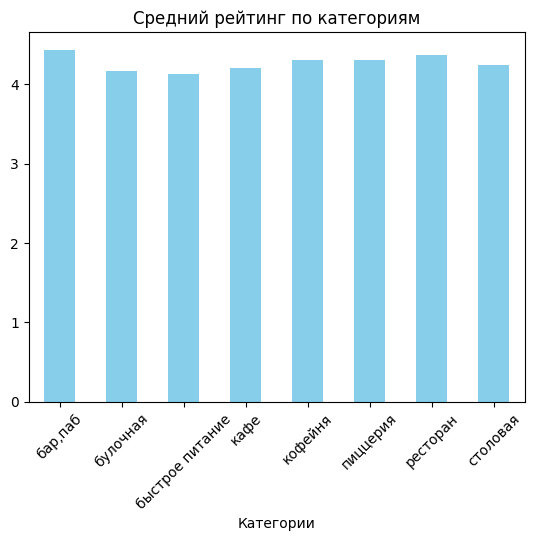

In [44]:
df_merged.groupby('category')['rating'].mean().plot(
    kind = 'bar',
    color = 'skyblue'
)
plt.title('Средний рейтинг по категориям')
plt.xlabel('Категории')
plt.xticks(rotation=45)

Видим, что средние рейтинги по категориям отличаются не сильно.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [50]:
from phik import phik_matrix
import seaborn as sns

Text(0.5, 1.0, 'Корреляционная матрица с коэффициентом phi_k для переменной rating')

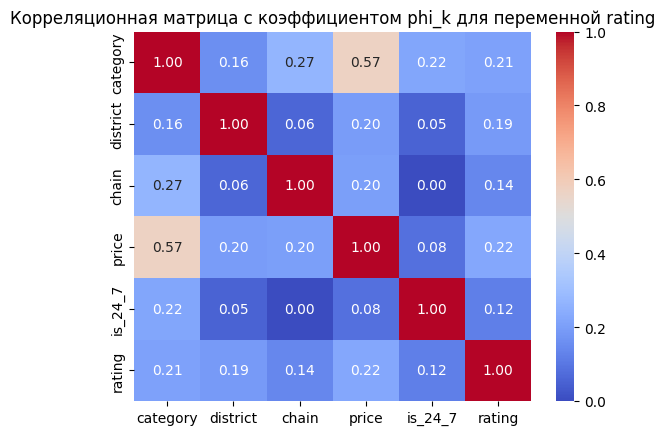

In [53]:
df_for_phik = df_merged[['category', 'district', 'chain', 'price', 'is_24_7', 'rating']]
correlation_matrix = df_for_phik.phik_matrix(interval_cols=['rating'])
#rating_corr = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица с коэффициентом phi_k для переменной rating')

Корреляцию с количеством мест исследуем отдельно, так как это не категориальная переменная

In [59]:
seats_corr = df_merged['seats'].corr(df_merged['rating'], method='pearson')
seats_corr

np.float64(-0.010369543510705553)

Видим, что коррелляция с количеством мест слабая.
Как итог делаем вывод, что самая большая коррелляция именно с ценовой категорией, однако и она достаточно мала.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [64]:
grouped_data = df_merged.groupby('name').agg({
    'id': 'count',      
    'rating': 'mean',
    'category' : 'first'
})
grouped_data_sorted = grouped_data.sort_values(by='id', ascending=False).head(15)
grouped_data_sorted

,id,rating,category
name,,,
шоколадница,74,4.175676,кофейня
додо пицца,72,4.287500,пиццерия
cofix,35,4.082857,кофейня
домино'с пицца,35,4.162857,пиццерия
кофепорт,30,4.120000,кофейня
кулинарная лавка братьев караваевых,29,4.396552,кафе
prime,25,4.124000,ресторан
теремок,23,4.182609,ресторан
хинкальная,19,4.336842,кафе


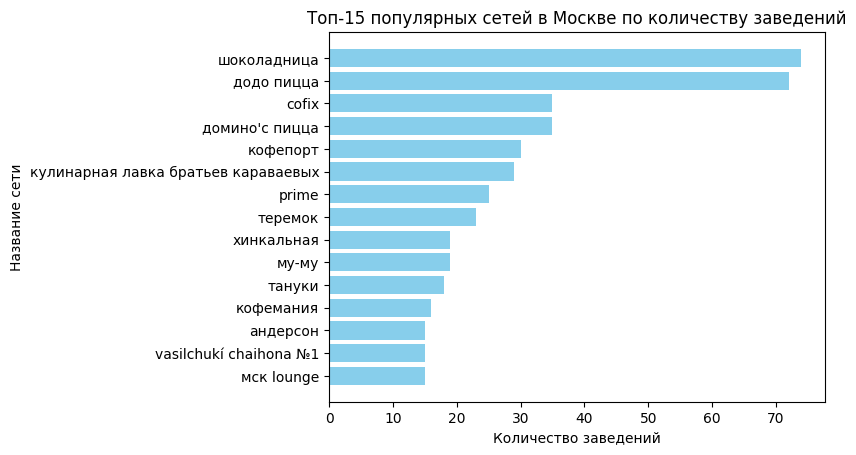

In [72]:
plt.barh(grouped_data_sorted.index, grouped_data_sorted['id'], color='skyblue')
plt.title('Топ-15 популярных сетей в Москве по количеству заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.gca().invert_yaxis()

Видим, что наибольшей популярностью пользуются рестораны, кофейни, кафе и пиццерии. Самыми популярными заведениями, причем с большим отрывом являются Шоколадница и додо пицца

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


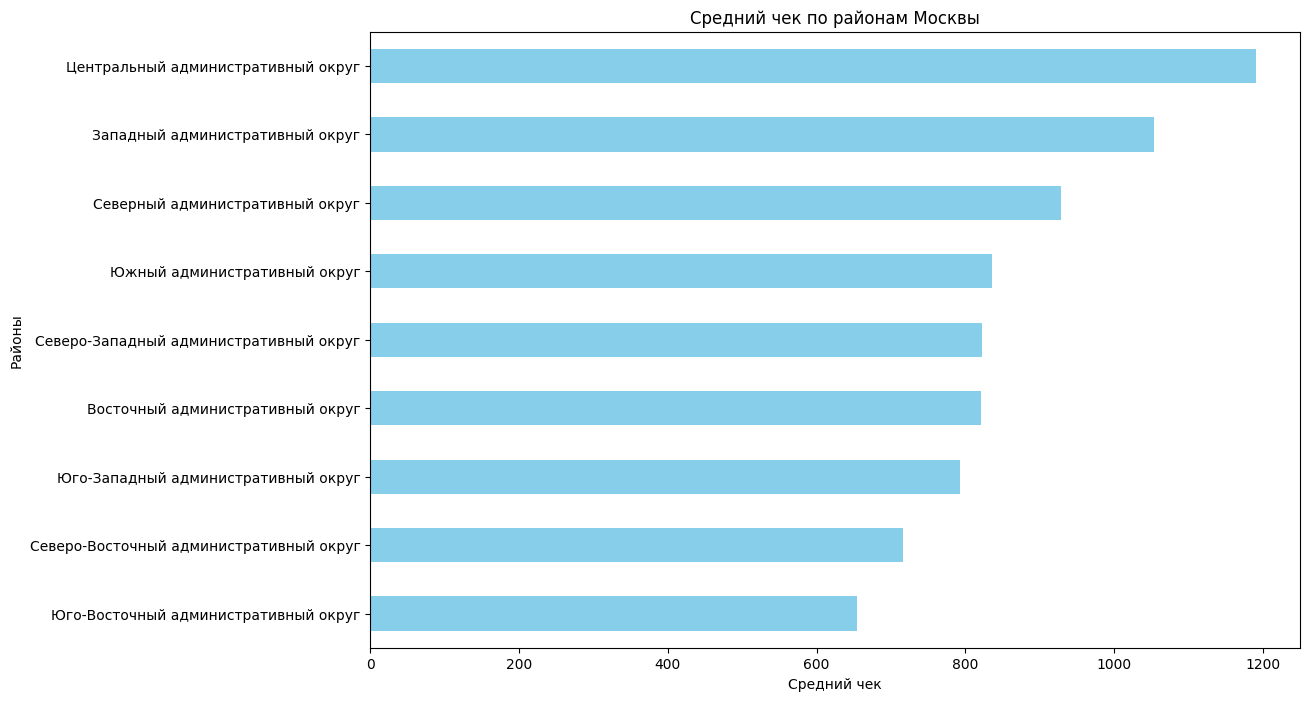

In [75]:
df_filtered = df_merged[df_merged['middle_avg_bill'] != -1]
avg_bill_by_district = df_filtered.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_bill_by_district.plot(kind='barh', color='skyblue')
plt.title('Средний чек по районам Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Районы')
plt.gca().invert_yaxis()
plt.show()

Видим, что при удалении от центра средняя цена снижается.